# There are multiple models here

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [3]:
import sklearn


print(sklearn.__version__)

1.3.2


In [3]:
!pip freeze >> requirements.txt

## emoji generator model

In [7]:
df = pd.read_csv('emoji.csv')
df.head()

,original_message,lisas_reply,reply_text,reply_emojis
0,imagine not having nitro lisa,:lisacat:,NaN,:lisacat:
1,make everyone admin,should i @brioche 🦑 @arin 🐢,should i @brioche 🦑 @arin 🐢,NaN
2,take photo of food,Don’t take a photo of food,Don’t take a photo of food,NaN
3,you are mean,:ken:,NaN,:ken:
4,No,that’s a bit mean,that’s a bit mean,NaN


In [3]:
df = pd.read_csv('emoji-syn.csv')
df.head()
print(df.columns)

Index(['original_message', 'lisas_reply', 'reply_text', 'reply_emojis',
       'synthetics ', 'author'],
      dtype='object')


In [5]:
#only run if using synthetic data
df['combined'] = df['reply_emojis'].combine_first(df['synthetics '])

print(df.columns)

Index(['original_message', 'lisas_reply', 'reply_text', 'reply_emojis',
       'synthetics ', 'author', 'combined'],
      dtype='object')


In [6]:
#only run if using synthetic data
df = df.dropna(subset=['combined'])
print(df.columns)
print(f"rows: {len(df)}")

df.drop(['lisas_reply','reply_text', 'synthetics ', 'reply_emojis'], axis=1, inplace=True)
df = df.rename(columns={'combined': 'reply_emojis'})

df.head()

Index(['original_message', 'lisas_reply', 'reply_text', 'reply_emojis',
       'synthetics ', 'author', 'combined'],
      dtype='object')
rows: 1039


,original_message,author,reply_emojis
0,imagine not having nitro lisa,e.rinh,:lisaCat:
1,make everyone admin,bombard21,:heheHarrison:
2,take photo of food,e.rinh,:catCry:
3,you are mean,e.rinh,:ken:
4,No,bombard21,:mad:


In [58]:
df = df.dropna(subset=['reply_emojis'])
df.drop(['lisas_reply','reply_text'], axis=1, inplace=True)

print(df.columns)
df.head()

KeyError: "['lisas_reply', 'reply_text'] not found in axis"

In [9]:
print(f"rows: {len(df)}")

rows: 1039


In [3]:
#only run if editing from training data
df = pd.read_csv('training.csv')

print(df.columns)

Index(['author', 'original_message', 'reply_emojis', 'encoded'], dtype='object')


In [4]:
# Encoding the string column to numeric values
df['encoded'] = pd.factorize(df['reply_emojis'])[0]

print(df)

                author                                   original_message  \
0               e.rinh                      imagine not having nitro lisa   
1            bombard21                                make everyone admin   
2               e.rinh                                 take photo of food   
3               e.rinh                                       you are mean   
4            bombard21                                                 No   
...                ...                                                ...   
1034  gentleman_nathan        Are there any homeware stores in Newmarket?   
1035         bombard21  ||@bozo ||\n\nReact to the days that you are c...   
1036        buddymmmm1                                Cricket every night   
1037  gentleman_nathan                                             right?   
1038            e.rinh  @pizza 💅🏻 @ae2 crip🦕 best bday present for you...   

             reply_emojis  encoded  
0               :lisaCat:        0  
1

In [9]:
#label_encoder = LabelEncoder()
#labels_encoded = label_encoder.fit_transform(df['reply_emojis'])

In [5]:
emoji_encoded = df['encoded'].tolist()
print(emoji_encoded)

[0, 1, 2, 3, 4, 3, 0, 5, 2, 6, 6, 7, 8, 8, 9, 10, 2, 10, 0, 11, 12, 13, 0, 14, 15, 16, 14, 4, 16, 5, 14, 17, 18, 0, 4, 15, 19, 14, 12, 2, 2, 0, 17, 2, 0, 20, 21, 22, 0, 17, 10, 23, 24, 2, 0, 21, 22, 2, 4, 9, 0, 0, 0, 17, 15, 24, 23, 17, 4, 22, 22, 24, 8, 22, 22, 25, 0, 21, 26, 5, 14, 22, 10, 2, 22, 27, 2, 0, 2, 0, 2, 18, 27, 2, 20, 2, 2, 18, 18, 27, 22, 0, 5, 4, 27, 2, 28, 22, 8, 7, 29, 10, 22, 24, 15, 24, 0, 26, 30, 24, 24, 0, 12, 22, 28, 0, 28, 7, 26, 4, 12, 0, 4, 21, 2, 24, 4, 29, 4, 7, 14, 16, 25, 9, 3, 14, 2, 23, 16, 16, 2, 3, 15, 2, 7, 7, 31, 24, 7, 26, 8, 32, 26, 26, 3, 3, 3, 18, 18, 3, 31, 10, 9, 7, 6, 0, 21, 31, 16, 31, 26, 26, 17, 0, 30, 25, 27, 24, 0, 24, 17, 15, 7, 7, 17, 27, 8, 17, 22, 24, 6, 28, 19, 24, 28, 1, 0, 24, 0, 15, 26, 0, 17, 23, 33, 33, 25, 0, 7, 0, 27, 29, 23, 4, 8, 3, 22, 21, 28, 0, 34, 0, 26, 34, 0, 17, 0, 22, 16, 24, 22, 5, 35, 3, 4, 9, 10, 22, 5, 15, 31, 0, 9, 22, 28, 22, 31, 31, 31, 31, 22, 25, 31, 31, 5, 24, 31, 9, 9, 9, 36, 9, 9, 22, 4, 31, 33, 24, 31, 2

In [6]:
emojis = pd.factorize(df['reply_emojis'])[1]

encoded_to_string = {i: string for i, string in enumerate(emojis)}
def get_emoji_back(encoded_number):
    return encoded_to_string.get(encoded_number, "Unknown")

print(get_emoji_back(7))

SHUT UP


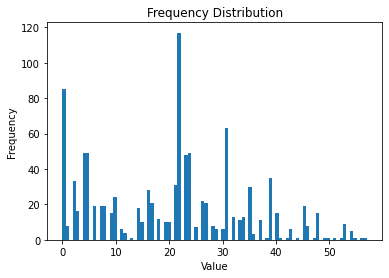

In [7]:
import matplotlib.pyplot as plt

plt.hist(emoji_encoded, bins=90)  # 'bins' can be an integer or 'auto' for automatic bin sizing
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [8]:
import pandas as pd
from collections import Counter

# Assuming 'emoji_encoded' is your list/array of encoded emojis
emoji_frequencies = Counter(emoji_encoded)

# Convert to a list of (emoji, frequency) pairs
emoji_freq_list = list(emoji_frequencies.items())

# Create a DataFrame with the emoji and their frequencies
emoji_freq_df = pd.DataFrame(emoji_freq_list, columns=['Emoji', 'Frequency'])

# Sort the DataFrame by frequency in descending order
emoji_freq_df = emoji_freq_df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Map the encoded numbers to their string representations
emoji_freq_df['Emoji_Char'] = emoji_freq_df['Emoji'].map(encoded_to_string)

# Display the DataFrame
print(emoji_freq_df)

emoji_freq_df.to_csv('emoji_freq_df.csv', index=False)

    Emoji  Frequency                                         Emoji_Char
0      22        117                                :erinnnnnnnnnnnnnn:
1       0         85                                          :lisaCat:
2      31         63                                             no you
3       5         49                                          :skull~1:
4      24         49  https://cdn.discordapp.com/emojis/841886073519...
5       4         49                                              :mad:
6      23         48                                              :yay:
7      39         35                                         :thinking:
8       2         33                                           :catCry:
9      21         31                                   :nathanielScary:
10     35         30                                               :no:
11     16         28                                          :ohHello:
12     10         24  https://cdn.discordapp.com/emojis/10690843

In [9]:
df.to_csv('training.csv', index=False)

In [10]:
df['author_and_message'] = df['author'] + ' ' + df['original_message']
print(df['author_and_message'])

0                    e.rinh imagine not having nitro lisa
1                           bombard21 make everyone admin
2                               e.rinh take photo of food
3                                     e.rinh you are mean
4                                            bombard21 No
                              ...                        
1034    gentleman_nathan Are there any homeware stores...
1035    bombard21 ||@bozo ||\n\nReact to the days that...
1036                       buddymmmm1 Cricket every night
1037                              gentleman_nathan right?
1038    e.rinh @pizza 💅🏻 @ae2 crip🦕 best bday present ...
Name: author_and_message, Length: 1039, dtype: object


In [11]:
frequency = Counter(emoji_encoded)

# Find the most common encoded value
most_common_encoded_value, count = frequency.most_common(1)[0]

print(f"The most common encoded value is {most_common_encoded_value} with a count of {count}")

The most common encoded value is 22 with a count of 117


In [12]:
X = df['author_and_message']

# Count Vectorise
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

# TFIDF Convert
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [13]:
# Split into training and test splits (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, emoji_encoded, test_size=0.1, random_state=0)

In [20]:
smote = SMOTE(random_state=42)

dt_classifier = DecisionTreeClassifier(
    class_weight='balanced',
    splitter='random',
    max_features='sqrt'  
)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
print(dt_y_pred)

[12 21  7 22 21  0 53  3  0 35 25 17 22  0 22 31 22 24 31 26 22  0  4 14
 22 32 16 23 19  5 22 35 18 22 35  0 31  9 31 31  0 12 35 22  0 24  4 22
  0 25  0  0  0 12  0  3  4 21  0  0  5 12  0 53 24 21 22 21  0  0 35 21
  5  4 22 21  4  4 22 22 48  7  9  0 39  6 26  0  2  0 22 27  0 22  0 37
 22 22 39  0  0  4 22  3]


In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
#function for outputting the most likely emoji
def predict_emoji(text, classifier, vectorizer):
    # Preprocess and vectorize the input text
    text_vectorized = vectorizer.transform([text])
    
    # Predict the emoji
    emoji_index = classifier.predict(text_vectorized)

    # Decode the emoji
    emoji = get_emoji_back(emoji_index[0])
    
    return emoji

text = "They didn’t want to sleep over"
predict_emoji(text, dt_classifier, vectorizer)

':erinnnnnnnnnnnnnn:'

In [18]:
#function for outputting any emoji as long as its probability is beyond the threshold. 
def predict_emoji(text, classifier, vectorizer, threshold=0.1):
    # Preprocess and vectorize the input text
    text_vectorized = vectorizer.transform([text])
    
    # Get probabilities for each emoji
    probabilities = classifier.predict_proba(text_vectorized)[0]

    # Filter out predictions with probabilities above the threshold
    high_prob_indices = [i for i, prob in enumerate(probabilities) if prob > threshold]

    # Decode the emojis
    emojis = [get_emoji_back(index) for index in high_prob_indices]
    
    return emojis

text = "racist"
predict_emoji(text, dt_classifier, vectorizer, threshold=0.1)

['https://cdn.discordapp.com/emojis/1070869015343411210.webp?size=128&quality=lossless']

In [19]:
# List of text examples
texts = [
    "support the troops sir",
    "it's a beautiful day",
    "feeling sad and down",
    "celebrating a big win!",
    "ready for the holidays",
    "erin you are a home",
    "llama!"
]

# Loop through each text example and predict emojis
for text in texts:
    emoji_predictions = predict_emoji(text, dt_classifier, vectorizer, threshold=0.1)
    print(f"Text: {text}")
    print(f"Predicted Emojis: {emoji_predictions}")
    print("---") 


Text: support the troops sir
Predicted Emojis: [':erinnnnnnnnnnnnnn:']
---
Text: it's a beautiful day
Predicted Emojis: [':yay:']
---
Text: feeling sad and down
Predicted Emojis: [':joever:']
---
Text: celebrating a big win!
Predicted Emojis: [':erinnnnnnnnnnnnnn:']
---
Text: ready for the holidays
Predicted Emojis: [':erinnnnnnnnnnnnnn:']
---
Text: erin you are a home
Predicted Emojis: ['https://cdn.discordapp.com/emojis/841886073519996979.gif?size=128&quality=lossless']
---
Text: llama!
Predicted Emojis: [':llama:']
---


In [21]:
print(accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred, zero_division=0))

0.18269230769230768
              precision    recall  f1-score   support

           0       0.12      0.50      0.20         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.33      1.00      0.50         1
           4       0.14      0.12      0.13         8
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
       

## now lets export the model 

In [22]:
print("Encoded to String Mapping:", encoded_to_string)

Encoded to String Mapping: {0: ':lisaCat:', 1: ':heheHarrison:', 2: ':catCry:', 3: ':ken:', 4: ':mad:', 5: ':skull~1:', 6: ':joever:', 7: 'SHUT UP', 8: 'https://cdn.discordapp.com/emojis/1070869015343411210.webp?size=128&quality=lossless', 9: ':clown~1:', 10: 'https://cdn.discordapp.com/emojis/1069084325720637500.webp?size=128&quality=lossless', 11: ':slayy:', 12: ':pigShock:', 13: ':hmm:', 14: 'https://cdn.discordapp.com/emojis/881182531536449587.gif?size=128&quality=lossless', 15: 'https://cdn.discordapp.com/emojis/750768558975484065.webp?size=128&quality=lossless', 16: ':ohHello:', 17: ':catcry:', 18: ':gun:', 19: 'https://cdn.discordapp.com/emojis/954378740958363748.webp?size=128&quality=lossless', 20: ':angy:', 21: ':nathanielScary:', 22: ':erinnnnnnnnnnnnnn:', 23: ':yay:', 24: 'https://cdn.discordapp.com/emojis/841886073519996979.gif?size=128&quality=lossless', 25: ':pigCold:', 26: ':harryBarbie:', 27: ':pigWoozy:', 28: 'https://cdn.discordapp.com/emojis/1089829892616618025.webp?

In [23]:
# Serialize the classifier
with open('classifier.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

# Serialize the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Serialize the encoded_to_string dictionary
with open('encoded_to_string.pkl', 'wb') as file:
    pickle.dump(encoded_to_string, file)

In [76]:
# load it back up
def load_pickle(file_name):
    with open(file_name, 'rb') as file:
        return pickle.load(file)

# Loading the serialized components
classifier = load_pickle('classifier.pkl')
vectorizer = load_pickle('vectorizer.pkl')
encoded_to_string = load_pickle('encoded_to_string.pkl')

# Your get_emoji_back function here
def get_emoji_back(encoded_number):
    return encoded_to_string.get(encoded_number, "Unknown")